<a href="https://colab.research.google.com/github/anibaltanganelli/nova_pratica_flora/blob/main/flora_pratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Em outubro, tive a oportunidade de participar de um Bootcamp de Ciência de Dados na Dio. Uma das tarefas propostas era trabalhar com uma IA Generativa para criar mensagens de relacionamento com o cliente, utilizando uma base simples de clientes. No entanto, decidi aproveitar essa oportunidade para aprofundar meus conhecimentos e práticas em SQL e Python, que venho estudando nos últimos meses.

Nesta publicação, compartilharei o passo a passo do projeto que desenvolvi, que vai além da proposta inicial do Bootcamp. Além disso, disponibilizarei todos os arquivos no meu Github, para que você possa ver em detalhes como tudo foi feito. Espero que você ache útil e informativo!

Desenvolvimento:

Para o desenvolvimento irei simular atividades de análise de dados, business intelligence e marketing. Também estou agregando ao conteúdo o desenvolvimento de uma ferramenta de AI que desenvolvi no Bootcamp Santander. Para o desafio foi solicitado o desenvolvimento da IA generativa em um diferente contexto.

Desenvolvimento

Utilizei diferentes recursos como a inteligência artificial Bing para a criação do contexto, o Mysql para o desenvolvimento do banco de dados e práticas com SQL, O Google Colab para o desenvolvimento em Python além do Google Docs para armazenamento do banco em CSV.

Contexto:

Empresa fictícia chamada Flora é uma floricultura online que entrega flores frescas e arranjos personalizados para os clientes e pretende fomentar um novo mercado, estimulando a revenda de seus produtos sem deixar de atender os clientes existentes.

A missão da Flora é oferecer uma experiência única e encantadora para os amantes de flores, com produtos de alta qualidade, atendimento personalizado e entrega rápida. A visão é se tornar a maior e mais confiável floricultura online do Brasil, expandindo sua presença para outras regiões e países. Os valores são paixão pelas flores, respeito pelos clientes, compromisso com a excelência, inovação e sustentabilidade.

A Flora foi fundada em 2020 por Ana e Bruno, dois amigos que compartilham o amor pelas flores e o sonho de empreender. Eles começaram a vender flores pela internet com um investimento inicial de R$10.000,00 e uma equipe de quatro pessoas.

A empresa cresceu rapidamente e atualmente possui mais de 15 funcionários, um estoque de mais de 20 tipos de flores e uma frota de 4 veículos para entrega. Ela se diferencia da concorrência por oferecer um serviço personalizado, onde os clientes podem escolher as flores, as cores, o estilo e a mensagem do arranjo. A Flora também oferece uma garantia de satisfação, onde os clientes podem solicitar a troca ou o reembolso do produto caso não fiquem satisfeitos.

A Flora utiliza as redes sociais, o e-mail marketing e o boca a boca para divulgar seus produtos e atrair novos clientes e também participa de eventos e feiras relacionados ao segmento de flores e decoração.

In [226]:
#importando bibliotecas para manipular dataframe
import pandas as pd
import numpy as np


In [227]:
# TRABALHANDO A TABELA PEDIDOS

'''
pedidos = pd.read_csv("/content/drive/MyDrive/Dados para estudo/Flora_pedidos.csv") ##importando a planilha
pedidos.head()
'''

# LIMPEZA DA TABELA PEDIDOS
'''
pedidos["id_pedido"] = pedidos['id_pedido'].astype(str).str.replace("(", "") #remover "(" da coluna id_pedido.
pedidos["valor_total"]= pedidos['valor_total'].astype(str).str.replace(".", "") #corrigindo o valor total que estava no formato x.xxx,xx
pedidos["valor_total"]= pedidos['valor_total'].astype(str).str.replace(",00", "")
pedidos["data_entrega"]= pedidos['data_entrega'].astype(str).str.replace(")", "")#alterando a data para o formato de data
pedidos["data_entrega"]= pedidos['data_entrega'].astype(str).str.replace(",", "")
pedidos.head()
'''
# AJUSTE DOS TIPOS DE DADOS
'''
pedidos.info()
pedidos['id_pedido'] = pd.to_numeric(pedidos['id_pedido']) #objeto para numérico
pedidos['id_cliente'] = pd.to_numeric(pedidos['id_cliente']) #objeto para numérico
pedidos['valor_total'] = pd.to_numeric(pedidos['valor_total']) #objeto para numérico
pedidos['data_pedido'] = pd.to_datetime(pedidos['data_pedido']) #objeto para data
pedidos['data_entrega'] = pd.to_datetime(pedidos['data_entrega']) #objeto para data
pedidos.info()
'''
# CRIANDO UMA COLUNA COM DADOS ALEATÓRIOS DA FORMA DE PAGAMENTO PARA AMPLIAR ESTUDO
'''
# Primeiro é necessário criar uma variável com a lista de formas de pagamento quw será sorteada
pagamentos_ = ['cartao', 'cartao_parcelado', 'pix', 'boleto']

# criando uma variável que faz, utilizando o numpy, o sorteio com os dados da variável respeitando o número de linhas da tabela pedido.
forma_pagamento = np.random.choice(pagamentos_, size=len(pedidos))

# criando uma coluna com a lista sorteada. Adicionando ao DataFrame
pedidos['forma_pagamento'] = forma_pagamento
'''
# BAIXANDO A PLANILHA PARA MANTER O PADRÃO
'''pd.DataFrame(pedidos).to_csv('pedidos_pgt.csv', index=False')'''


"pd.DataFrame(pedidos).to_csv('pedidos_pgt.csv', index=False')"

In [228]:
#TABELA PEDIDOS ATUALIZADA
pedidos = pd.read_csv("/content/drive/MyDrive/Dados para estudo/pedidos_pgt.csv", index_col = False)
pedidos.head()

,id_pedido,id_cliente,id_produto,quantidade,valor_total,data_pedido,data_entrega,forma_pagamento
0,123433,1,1,234,2340,2022-01-02,2022-01-03,cartao_parcelado
1,123434,2,2,123,1476,2022-01-02,2022-01-03,cartao
2,123435,3,3,111,1665,2022-01-02,2022-01-03,cartao
3,123436,4,4,144,2880,2022-01-02,2022-01-03,pix
4,123437,5,5,132,1056,2022-01-02,2022-01-03,cartao_parcelado


In [229]:
# CRIANDO UMA TABELA PAGAMENTOS (id_cliente, data de pagamento, valor total e forma de pagamento e status do pagamento)
'''pagamentos = pedidos[["id_cliente", "data_pedido", "valor_total", "forma_pagamento"]].copy() #utilizando informações da tabela pedidos'''

# ADICIONANDO COLUNA STATUS. (cartão e pix sempre estarão pagos, laçamento aleatório em boleto).

'''pagto_boleto = ['pago', 'em aberto']

def status_pagamento (modo):
  if modo == 'cartao':
       return 'pago'
  elif modo ==  'cartao_parcelado':
       return 'pago'
  elif modo == 'pix':
        return 'pago'
  elif modo == 'boleto':
        return np.random.choice(pagto_boleto)
  else:
        return 'em aberto'
'''
#Inserindo na coluna status os dados da função
'''pagamentos['status'] = pagamentos['forma_pagamento'].apply(status_pagamento)'''

# BAIXANDOA PLANILHA PAGAMENTOS PARA MANTER O PADRÃO
'''pd.DataFrame(pagamentos).to_csv("Flora_pagamentos.csv")'''

'pd.DataFrame(pagamentos).to_csv("Flora_pagamentos.csv")'

In [230]:
#TABELA PAGAMENTOS
pagamentos = pd.read_csv("/content/drive/MyDrive/Dados para estudo/Flora_pagamentos.csv", index_col=False)
pagamentos = pagamentos.loc[:, ~pagamentos.columns.str.contains('^Unnamed')]
pagamentos.head()

,id_cliente,data_pedido,valor_total,forma_pagamento,status
0,1,2022-01-02,2340,cartao_parcelado,pago
1,2,2022-01-02,1476,cartao,pago
2,3,2022-01-02,1665,cartao,pago
3,4,2022-01-02,2880,pix,pago
4,5,2022-01-02,1056,cartao_parcelado,pago


In [231]:
# UPLOAD DE FORNECEDORES
fornecedores = pd.read_csv("/content/drive/MyDrive/Dados para estudo/Flora_fornecedores.csv", index_col=False)
fornecedores.head()

,id_fornecedor,nome_fornecedor,contato_fornecedor
0,1233,Fornecedores de Flores Maravilhosas,contato@floresmaravilhosas.com
1,2331,Jardim Encantado,atendimento@jardimencantado.com
2,3312,Bouquet da Felicidade,suporte@bouquetfelicidade.com
3,1444,Flores do Paraíso,info@floresdoparaiso.com
4,5123,Jardim das Rosas,contato@jardimdasrosas.com


In [287]:
#CARREGANNDO TABELA PRODUTOS PARA INCREMENTAR E TRATAR DADOS
'''
produtos = pd.read_csv("/content/drive/MyDrive/Dados para estudo/Flora_produtos.csv")
produtos.head()
'''
# LIMPEZA DE DADOS

'''
produtos['preco_produto'] = produtos['preco_produto'].str.replace("R", "")

produtos['preco_produto'] = produtos['preco_produto'].str.replace("$", "")

'''
#ADICIONANDO COLUNA CUSTO DO PRODUTO
'''
custo_pr = [ 3.12 , 4.32, 2.5, 4.56, 3.24, 4.21, 3.11]

custo_produto = np.random.choice(custo_pr, len(produtos))

produtos['custos'] = custo_produto

produtos.head()
'''
#ALTERAÇÃO DOS DADOS
"""
produtos['preco_produto'] = pd.to_numeric(produtos['preco_produto']) #objeto para numérico
"""
#BAIXANDO PLANILHA PRODUTOS
"""
pd.DataFrame(produtos).to_csv(Flora_produtos.csv)
"""

# UPLOAD PRODUTOS
produtos = pd.read_csv("/content/drive/MyDrive/Dados para estudo/Flora_produtos.csv", index_col=False)
produtos = produtos.loc[:, ~produtos.columns.str.contains('^Unnamed')]

produtos.head()

,id_produto,nome_produto,preco_produto,descricao,id_fornecedor,custos
0,1,Rosa Vermelha,10,Rosa vermelha de alta qualidade,1233,4.56
1,2,Rosa Branca,12,Rosa branca elegante,2331,3.12
2,3,Lírio,15,Lírio branco fresco,3312,4.32
3,4,Orquídea,20,Orquídea roxa vibrante,1444,3.24
4,5,Girassol,8,Girassol grande e brilhante,5123,4.56


In [233]:
#SUBINDO TABELA CLIENTES

clientes = pd.read_csv('/content/drive/MyDrive/Estudos_Dados_flora/Flora_clientes.csv', index_col=False)
clientes= clientes.loc[:, ~clientes.columns.str.contains('^Unnamed')]

#ALTERANDO TIPO DE DADOS
'''clientes['data_nascimento'] = pd.to_datetime(clientes['data_nascimento']) # alterando para data
clientes['nome_cliente'] = clientes['nome_cliente'].astype(str)'''

# ADICIONANDO UMA COLUNA COM O TIPO DE EMPREENDIMENTO
'''tipo_empresa = ['floricultura', 'loja de presentes', 'autônomo', 'decoração', 'cerimonialista', 'buffet', 'salão de festas', 'supermercado', 'marketplace', 'igreja', 'outros']
empreendimento = np.random.choice(tipo_empresa, size=len(clientes))
clientes['empreendimento'] = empreendimento
'''
#BAIXANDO
'''pd.DataFrame(clientes).to_csv("Flora_clientes.csv")'''
clientes.head()

,id_cliente,nome_cliente,data_nascimento,sexo,endereco,cidade,CPF,email,telefone,empreendimento
0,1,João Silva,1980-01-01,M,Rua das Flores,Sao Paulo,123.456.789-00,joao.silva@email.com,11 12345-6789,marketplace
1,2,Maria Santos,1985-02-02,F,Avenida do Sol,Limeira,234.567.890-11,maria.santos@email.com,11 23456-7890,decoração
2,3,Pedro Oliveira,1990-03-03,M,Travessa da Lua,Campinas,345.678.901-22,pedro.oliveira@email.com,11 34567-8901,buffet
3,4,Ana Pereira,1995-04-04,F,Beco do Vento,Sumaré,456.789.012-33,ana.pereira@email.com,11 45678-9012,cerimonialista
4,5,Lucas Costa,2000-05-05,M,Estrada da Chuva,Santo Andre,567.890.123-44,lucas.costa@email.com,11 56789-0123,igreja


Exploração de Dados
Apresente as consultas SQL que você usou para explorar os dados.
Mostre os resultados dessas consultas e explique o que elas revelam sobre os dados.


# Análise dos dados


##Estatística

In [234]:
import statistics as st

### ESTUDO VALOR_TOTAL DA TABELA PEDIDOS




In [235]:
#Distribuição de dados:
pedidos['valor_total'].describe()

count     274.000000
mean     1679.222628
std      1223.123590
min       186.000000
25%       924.000000
50%      1353.000000
75%      2178.000000
max      8417.000000
Name: valor_total, dtype: float64

In [236]:
# moda

moda = st.mode(pedidos['valor_total'])
print('a moda é:', moda)

a moda é: 888


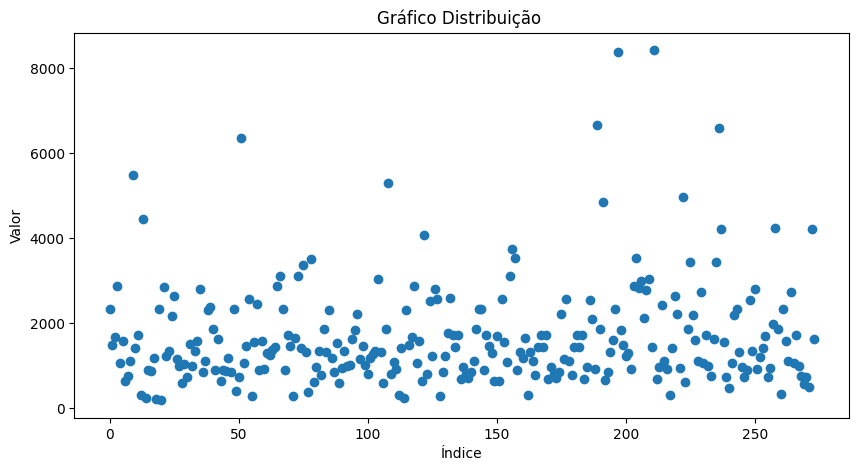

In [237]:
#Gráfico de distribuição dos valores

import matplotlib.pyplot as plt

np.random.seed(0)
outliers_VT = pedidos['valor_total']

# Criando o gráfico
plt.figure(figsize=(10,5))
plt.plot(outliers_VT, 'o')
plt.title('Gráfico Distribuição ')
plt.xlabel('Índice')
plt.ylabel('Valor')

plt.show()


In [238]:
#Quartis

Q1 = pedidos['valor_total'].quantile(0.25)
Q2 = pedidos['valor_total'].quantile(0.50)
Q3 = pedidos['valor_total'].quantile(0.75)

print(f'Primeiro Quartil: {Q1}')
print(f'Segundo Quartil (Mediana): {Q2}')
print(f'Terceiro Quartil: {Q3}')


Primeiro Quartil: 924.0
Segundo Quartil (Mediana): 1353.0
Terceiro Quartil: 2178.0


Análise
- o gasto médio é de 1.679,22 com um desvio padrão de 1223,12 o que pode indicar um descio normal, porém muito próximo ao limite.
- A moda tem o valor de 888,00
- Com o valor de 1.353,00, 50% das compras estão abaixo do valor médio.
- A presença de outliers deve ser avaliada e estudados para avaliar características que permitam ações para influenciar o aumento do gasto dos clientes de mesmo perfil.



In [239]:
quartil_inferior_VT = pedidos[pedidos['valor_total'] < Q1]
quartil_inferior_VT.head()

,id_pedido,id_cliente,id_produto,quantidade,valor_total,data_pedido,data_entrega,forma_pagamento
6,123439,7,7,90,630,2022-01-04,2022-01-06,boleto
7,123440,8,8,85,765,2022-01-04,2022-01-06,cartao
12,123445,13,13,31,310,2022-01-04,2022-01-06,cartao
14,123447,15,15,31,248,2022-01-04,2022-01-06,cartao_parcelado
15,123448,16,16,74,888,2022-01-04,2022-01-06,cartao


In [240]:
# Analisando o primeiro quartil
quartil_inferior_VT['valor_total'].describe()

count     68.000000
mean     655.294118
std      212.680060
min      186.000000
25%      581.750000
50%      724.500000
75%      822.250000
max      900.000000
Name: valor_total, dtype: float64

- 74 pedidos estão com valor correspondente ao primeiro quartil, correspondendo a 27% dos pedidos
- o quartil inferior está muito abaixo da média geral e tem valor 34% abaixo da moda geral

In [241]:
#IDENTIFICANDO
mascara_inferior = clientes['id_cliente'].isin(quartil_inferior_VT['id_cliente'])
clientes_quartil_inferior = clientes[mascara_inferior]
clientes_quartil_inferior.head()

,id_cliente,nome_cliente,data_nascimento,sexo,endereco,cidade,CPF,email,telefone,empreendimento
0,1,João Silva,1980-01-01,M,Rua das Flores,Sao Paulo,123.456.789-00,joao.silva@email.com,11 12345-6789,marketplace
1,2,Maria Santos,1985-02-02,F,Avenida do Sol,Limeira,234.567.890-11,maria.santos@email.com,11 23456-7890,decoração
2,3,Pedro Oliveira,1990-03-03,M,Travessa da Lua,Campinas,345.678.901-22,pedro.oliveira@email.com,11 34567-8901,buffet
3,4,Ana Pereira,1995-04-04,F,Beco do Vento,Sumaré,456.789.012-33,ana.pereira@email.com,11 45678-9012,cerimonialista
4,5,Lucas Costa,2000-05-05,M,Estrada da Chuva,Santo Andre,567.890.123-44,lucas.costa@email.com,11 56789-0123,igreja


In [242]:
clientes_quartil_inferior['empreendimento'].describe()

count         35
unique        11
top       buffet
freq           7
Name: empreendimento, dtype: object

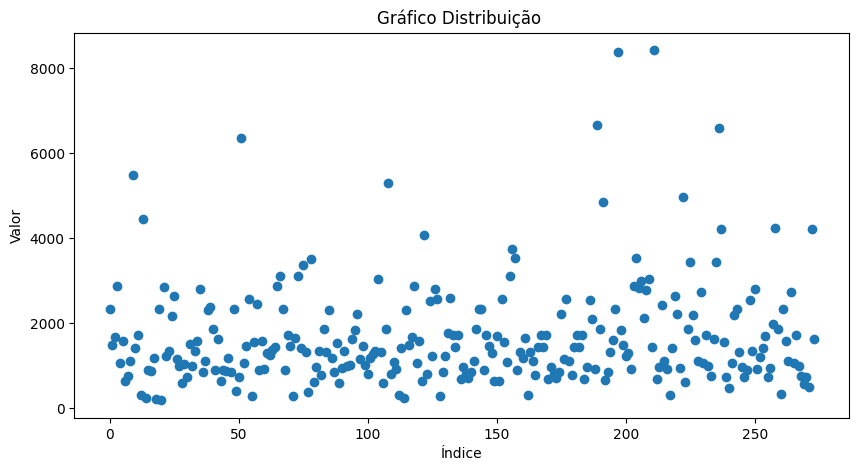

In [243]:
#Gráfico de distribuição dos valores

import matplotlib.pyplot as plt

np.random.seed(0)
outliers_VT = pedidos['valor_total']

# Criando o gráfico
plt.figure(figsize=(10,5))
plt.plot(outliers_VT, 'o')
plt.title('Gráfico Distribuição ')
plt.xlabel('Índice')
plt.ylabel('Valor')

plt.show()


In [244]:
#Analisando a mediana
quartil_mediana_VT = pedidos[(pedidos['valor_total'] > Q1) & (pedidos['valor_total'] < Q2)]
quartil_mediana_VT.head()

,id_pedido,id_cliente,id_produto,quantidade,valor_total,data_pedido,data_entrega,forma_pagamento
4,123437,5,5,132,1056,2022-01-02,2022-01-03,cartao_parcelado
8,123441,9,9,80,1120,2022-01-04,2022-01-06,boleto
17,123450,18,18,132,1188,2022-01-04,2022-01-06,pix
22,123455,23,1,123,1230,2022-02-01,2022-02-04,cartao_parcelado
23,123456,24,2,111,1332,2022-02-01,2022-02-04,pix


In [245]:
quartil_mediana_VT['valor_total'].describe()

count      62.000000
mean     1137.935484
std       131.421718
min       948.000000
25%      1016.000000
50%      1110.000000
75%      1253.000000
max      1342.000000
Name: valor_total, dtype: float64

In [246]:
#IDENTIFICANDO
mascara_mediana= clientes['id_cliente'].isin(quartil_mediana_VT['id_cliente'])
clientes_mediana = clientes[mascara_mediana]
clientes_mediana.head()

,id_cliente,nome_cliente,data_nascimento,sexo,endereco,cidade,CPF,email,telefone,empreendimento
0,1,João Silva,1980-01-01,M,Rua das Flores,Sao Paulo,123.456.789-00,joao.silva@email.com,11 12345-6789,marketplace
1,2,Maria Santos,1985-02-02,F,Avenida do Sol,Limeira,234.567.890-11,maria.santos@email.com,11 23456-7890,decoração
3,4,Ana Pereira,1995-04-04,F,Beco do Vento,Sumaré,456.789.012-33,ana.pereira@email.com,11 45678-9012,cerimonialista
4,5,Lucas Costa,2000-05-05,M,Estrada da Chuva,Santo Andre,567.890.123-44,lucas.costa@email.com,11 56789-0123,igreja
5,6,Julia Mendes,2005-06-06,F,Alameda do Trovão,Campinas,678.901.234-55,julia.mendes@email.com,11 67890-1234,cerimonialista


In [247]:
clientes_mediana['empreendimento'].describe()

count         32
unique        10
top       buffet
freq           8
Name: empreendimento, dtype: object

In [248]:
quartil_superior_VT = pedidos[pedidos['valor_total'] > Q3]
quartil_superior_VT .head()

,id_pedido,id_cliente,id_produto,quantidade,valor_total,data_pedido,data_entrega,forma_pagamento
0,123433,1,1,234,2340,2022-01-02,2022-01-03,cartao_parcelado
3,123436,4,4,144,2880,2022-01-02,2022-01-03,pix
9,123442,10,10,342,5472,2022-01-04,2022-01-06,cartao_parcelado
13,123446,14,14,234,4446,2022-01-04,2022-01-06,cartao
19,123452,20,20,234,2340,2022-02-01,2022-02-04,boleto


In [249]:
quartil_superior_VT['valor_total'].describe()

count      69.000000
mean     3288.449275
std      1383.367242
min      2184.000000
25%      2376.000000
50%      2808.000000
75%      3510.000000
max      8417.000000
Name: valor_total, dtype: float64

In [250]:
#IDENTIFICANDO
mascara_superior= clientes['id_cliente'].isin(quartil_superior_VT['id_cliente'])
clientes_quartil_superior_VT = clientes[mascara_superior]
clientes_quartil_superior_VT.head()

,id_cliente,nome_cliente,data_nascimento,sexo,endereco,cidade,CPF,email,telefone,empreendimento
0,1,João Silva,1980-01-01,M,Rua das Flores,Sao Paulo,123.456.789-00,joao.silva@email.com,11 12345-6789,marketplace
1,2,Maria Santos,1985-02-02,F,Avenida do Sol,Limeira,234.567.890-11,maria.santos@email.com,11 23456-7890,decoração
2,3,Pedro Oliveira,1990-03-03,M,Travessa da Lua,Campinas,345.678.901-22,pedro.oliveira@email.com,11 34567-8901,buffet
3,4,Ana Pereira,1995-04-04,F,Beco do Vento,Sumaré,456.789.012-33,ana.pereira@email.com,11 45678-9012,cerimonialista
4,5,Lucas Costa,2000-05-05,M,Estrada da Chuva,Santo Andre,567.890.123-44,lucas.costa@email.com,11 56789-0123,igreja


In [251]:
clientes_quartil_superior_VT ['empreendimento'].describe()

count         33
unique         9
top       buffet
freq           6
Name: empreendimento, dtype: object

In [252]:
# Quem são os outliers

IQR = Q3 - Q1
IQR

1254.0

In [253]:
#Qualquer número abaixo do limite inferior ou acima do limite superior é considerado um outlier.

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


print(f'O limite inferior é {limite_inferior}')
print(f'O limite superior é {limite_superior}')

O limite inferior é -957.0
O limite superior é 4059.0


In [254]:
#Outliers superior a serem estudados

out_superior = pedidos[pedidos['valor_total'] > 4059.0]
out_superior.head()

##Quem são, quais produtos compram, com qual frequência, como pagam, onde estão?

,id_pedido,id_cliente,id_produto,quantidade,valor_total,data_pedido,data_entrega,forma_pagamento
9,123442,10,10,342,5472,2022-01-04,2022-01-06,cartao_parcelado
13,123446,14,14,234,4446,2022-01-04,2022-01-06,cartao
51,123484,44,14,334,6346,2022-03-05,2022-03-06,boleto
108,123541,3,16,441,5292,2022-04-01,2022-04-02,cartao
122,123555,17,12,313,4069,2022-05-03,2022-05-08,cartao_parcelado


###ESTUDO FORMA_PAGAMENTO DA TABELA PEDIDOS

###ESTUDO QUANTIDADE DA TABELA PEDIDOS

In [255]:
pedidos['quantidade'].describe()

count    274.000000
mean     150.197080
std       87.486165
min       31.000000
25%       90.000000
50%      132.000000
75%      212.750000
max      443.000000
Name: quantidade, dtype: float64

In [256]:
pedidos['forma_pagamento'].describe()

count        274
unique         4
top       boleto
freq          78
Name: forma_pagamento, dtype: object

In [257]:
pagamentos['status'].describe()

count      274
unique       2
top       pago
freq       244
Name: status, dtype: object

In [258]:
produtos['preco_produto'].describe()

count    22.000000
mean     11.500000
std       4.020779
min       6.000000
25%       8.250000
50%      10.500000
75%      13.750000
max      20.000000
Name: preco_produto, dtype: float64

In [259]:
pagamentos['forma_pagamento'].describe()

count        274
unique         4
top       boleto
freq          78
Name: forma_pagamento, dtype: object

In [260]:
clientes['sexo'].describe()

count     44
unique     2
top       M 
freq      22
Name: sexo, dtype: object

In [261]:
clientes['cidade'].describe()

count            44
unique            6
top       Sao Paulo
freq              9
Name: cidade, dtype: object

In [262]:
clientes['empreendimento'].describe()

count         44
unique        11
top       buffet
freq           9
Name: empreendimento, dtype: object

###PRATRICANDO AMOSTRA

In [263]:
# Amostragem Simples
np.random.seed(1)
amostra_pedidos_fracao = pedidos.sample(frac=0.20) #criação de uma amostra simples aleatória com uma fração de 20% dos dados
amostra_pedidos_fracao

,id_pedido,id_cliente,id_produto,quantidade,valor_total,data_pedido,data_entrega,forma_pagamento
58,123491,15,5,111,888,2022-03-05,2022-03-06,pix
101,123534,15,9,85,1190,2022-04-01,2022-04-02,boleto
186,123619,5,17,231,2541,2022-08-01,2022-08-08,cartao_parcelado
116,123549,11,2,123,1476,2022-05-03,2022-05-08,boleto
11,123444,12,12,132,1716,2022-01-04,2022-01-06,pix
18,123451,19,19,31,217,2022-02-01,2022-02-04,cartao_parcelado
229,123662,5,14,144,2736,2022-11-04,2022-11-15,cartao_parcelado
145,123578,44,15,111,888,2022-06-08,2022-06-15,pix
179,123612,40,19,111,777,2022-08-01,2022-08-08,boleto
110,123543,5,18,121,1089,2022-04-01,2022-04-02,boleto


In [264]:
amostra_pedidos_quantidade = pedidos.sample(55) #amostra simples aleatória com 55 inddivíduos
amostra_pedidos_quantidade


,id_pedido,id_cliente,id_produto,quantidade,valor_total,data_pedido,data_entrega,forma_pagamento
155,123588,33,9,222,3108,2022-07-01,2022-07-02,cartao
90,123523,6,16,79,948,2022-04-01,2022-04-02,cartao
254,123687,9,22,211,1688,2022-12-10,2022-12-11,pix
108,123541,3,16,441,5292,2022-04-01,2022-04-02,cartao
22,123455,23,1,123,1230,2022-02-01,2022-02-04,cartao_parcelado
168,123601,5,13,144,1440,2022-08-01,2022-08-08,boleto
266,123699,1,16,144,1728,2022-12-10,2022-12-11,boleto
47,123480,6,19,121,847,2022-02-05,2022-02-06,cartao
159,123592,15,17,121,1331,2022-07-01,2022-07-02,boleto
134,123567,8,13,144,1440,2022-06-03,2022-06-05,pix


In [265]:
#Amostra sistemática
pedidos.shape

(274, 8)

In [266]:
np.random.seed(2)
inicio = np.random.choice(10, 1) #seleciona aleatóriamente o início
inicio

array([8])

In [267]:
amos_sistematica= np.arange(inicio, 274, 6) #na execução selecionou o 8. Inicio em 8, de 6 em 6 até chegar no 274
amos_sistematica.shape

(45,)

In [268]:
amostra_sistematica = pedidos.iloc[amos_sistematica,:]
amostra_sistematica

,id_pedido,id_cliente,id_produto,quantidade,valor_total,data_pedido,data_entrega,forma_pagamento
8,123441,9,9,80,1120,2022-01-04,2022-01-06,boleto
14,123447,15,15,31,248,2022-01-04,2022-01-06,cartao_parcelado
20,123453,21,21,31,186,2022-02-01,2022-02-04,cartao
26,123459,27,5,144,1152,2022-02-01,2022-02-04,pix
32,123465,33,15,123,984,2022-02-01,2022-02-04,pix
38,123471,39,10,144,2304,2022-02-05,2022-02-06,boleto
44,123477,40,16,74,888,2022-02-05,2022-02-06,boleto
50,123483,43,13,74,740,2022-03-05,2022-03-06,boleto
56,123489,35,19,222,1554,2022-03-05,2022-03-06,pix
62,123495,26,9,90,1260,2022-03-05,2022-03-07,pix


In [269]:
#Amostra estratificada pequenos grupos

amostra_cartao = pedidos.loc[pedidos.forma_pagamento == "cartao"].sample(frac=0.10) #selecionando 10% de cada um
amostra_cartao

,id_pedido,id_cliente,id_produto,quantidade,valor_total,data_pedido,data_entrega,forma_pagamento
149,123582,7,19,90,630,2022-06-12,2022-06-16,cartao
1,123434,2,2,123,1476,2022-01-02,2022-01-03,cartao
204,123637,28,5,441,3528,2022-09-03,2022-09-08,cartao
260,123693,15,6,31,341,2022-12-10,2022-12-11,cartao
86,123519,39,12,90,1170,2022-03-09,2022-03-11,cartao
193,123626,32,19,121,847,2022-09-03,2022-09-08,cartao


In [270]:
amostra_cartao_parc = pedidos.loc[pedidos.forma_pagamento == "cartao_parcelado"].sample(frac=0.10)
amostra_cartao_parc

,id_pedido,id_cliente,id_produto,quantidade,valor_total,data_pedido,data_entrega,forma_pagamento
181,123614,42,12,132,1716,2022-08-01,2022-08-08,cartao_parcelado
136,123569,10,15,85,680,2022-06-03,2022-06-05,cartao_parcelado
48,123481,7,20,234,2340,2022-02-05,2022-02-06,cartao_parcelado
10,123443,11,11,79,1422,2022-01-04,2022-01-06,cartao_parcelado
122,123555,17,12,313,4069,2022-05-03,2022-05-08,cartao_parcelado
92,123525,8,18,111,999,2022-04-01,2022-04-02,cartao_parcelado
236,123669,32,10,412,6592,2022-11-04,2022-11-15,cartao_parcelado


In [271]:
amostra_boleto = pedidos.loc[pedidos.forma_pagamento == "boleto"].sample(frac=0.10)
amostra_boleto

,id_pedido,id_cliente,id_produto,quantidade,valor_total,data_pedido,data_entrega,forma_pagamento
202,123635,26,19,132,924,2022-09-03,2022-09-08,boleto
205,123638,29,8,313,2817,2022-09-03,2022-09-08,boleto
68,123501,7,15,111,888,2022-03-05,2022-03-08,boleto
119,123552,14,5,132,1056,2022-05-03,2022-05-08,boleto
101,123534,15,9,85,1190,2022-04-01,2022-04-02,boleto
110,123543,5,18,121,1089,2022-04-01,2022-04-02,boleto
116,123549,11,2,123,1476,2022-05-03,2022-05-08,boleto
51,123484,44,14,334,6346,2022-03-05,2022-03-06,boleto


In [272]:
amostra_pix = pedidos.loc[pedidos.forma_pagamento == "pix"].sample(frac=0.10)
amostra_pix

,id_pedido,id_cliente,id_produto,quantidade,valor_total,data_pedido,data_entrega,forma_pagamento
160,123593,16,18,132,1188,2022-07-01,2022-07-02,pix
35,123468,36,18,311,2799,2022-02-05,2022-02-06,pix
49,123482,8,12,31,403,2022-03-05,2022-03-06,pix
114,123547,9,22,31,248,2022-04-01,2022-04-02,pix
21,123454,22,22,355,2840,2022-02-01,2022-02-04,pix
219,123652,32,22,331,2648,2022-10-01,2022-10-05,pix


In [273]:
amostra_estratificada = pd.concat([amostra_boleto, amostra_cartao, amostra_cartao_parc, amostra_pix])
amostra_estratificada

,id_pedido,id_cliente,id_produto,quantidade,valor_total,data_pedido,data_entrega,forma_pagamento
202,123635,26,19,132,924,2022-09-03,2022-09-08,boleto
205,123638,29,8,313,2817,2022-09-03,2022-09-08,boleto
68,123501,7,15,111,888,2022-03-05,2022-03-08,boleto
119,123552,14,5,132,1056,2022-05-03,2022-05-08,boleto
101,123534,15,9,85,1190,2022-04-01,2022-04-02,boleto
110,123543,5,18,121,1089,2022-04-01,2022-04-02,boleto
116,123549,11,2,123,1476,2022-05-03,2022-05-08,boleto
51,123484,44,14,334,6346,2022-03-05,2022-03-06,boleto
149,123582,7,19,90,630,2022-06-12,2022-06-16,cartao
1,123434,2,2,123,1476,2022-01-02,2022-01-03,cartao


### PRATICANDO MÉDIA

In [274]:
custo_medio_un = produtos['custos'].mean()
preco_medio_un = produtos['preco_produto'].mean()
receita_media_cliente = pedidos['valor_total'].sum().mean()
custo_medio_cliente = pedidos['quantidade'].sum() * custo_medio_un
lucro_medio = (receita_media_cliente - custo_medio_cliente)


print(f'O custo médio unitario é de R${custo_medio_un:.2f}, o preço médio unitário é de R${preco_medio_un:.2f} e o lucro médio unitário é de R${preco_medio_un - custo_medio_un:.2f}.\n'
      f'A receita média por cliente é de R${receita_media_cliente:.2f}, o custo médio da matéria prima por cliente é de R${custo_medio_cliente:.2f} e o lucro médio por cliente é de R${lucro_medio}.')

O custo médio unitario é de R$3.74, o preço médio unitário é de R$11.50 e o lucro médio unitário é de R$7.76.
A receita média por cliente é de R$460107.00, o custo médio da matéria prima por cliente é de R$153953.37 e o lucro médio por cliente é de R$306153.6272727273.


###PRATICANDO CORRELAÇÃO

In [275]:
pedidos_produtos = pd.merge(pedidos, produtos, on='id_produto') #mesclando a tabela pedido com a produtos para avaliar as correlações possíveis

pedidos_produtos.head(1)

,id_pedido,id_cliente,id_produto,quantidade,valor_total,data_pedido,data_entrega,forma_pagamento,Unnamed: 0,nome_produto,preco_produto,descricao,id_fornecedor,custos
0,123433,1,1,234,2340,2022-01-02,2022-01-03,cartao_parcelado,0,Rosa Vermelha,10,Rosa vermelha de alta qualidade,1233,4.56


In [276]:
correlacao_preco_quantidade = pedidos_produtos['preco_produto'].corr(pedidos_produtos['quantidade'])
correlacao_preco_quantidade


#'''Note que a correlação varia de -1 a 1. Um valor próximo de 1 indica uma forte correlação positiva (quando o preço aumenta, a quantidade vendida também aumenta),
# um valor próximo de -1 indica uma forte correlação negativa (quando o preço aumenta, a quantidade vendida diminui) e um valor próximo de 0 indica que não há correlação.'''

-0.02378493762202389

In [277]:
pedidos_produtos.head(1)


,id_pedido,id_cliente,id_produto,quantidade,valor_total,data_pedido,data_entrega,forma_pagamento,Unnamed: 0,nome_produto,preco_produto,descricao,id_fornecedor,custos
0,123433,1,1,234,2340,2022-01-02,2022-01-03,cartao_parcelado,0,Rosa Vermelha,10,Rosa vermelha de alta qualidade,1233,4.56


In [278]:
pedidos_produtos['data_pedido'] = pd.to_datetime(pedidos_produtos['data_pedido'])
pedidos_produtos['month'] = pedidos_produtos['data_pedido'].dt.month
correlacao_mes_quantidade = pedidos_produtos['month'].corr(pedidos_produtos['quantidade'])
correlacao_mes_quantidade

0.18144872532765158

###AGRUPAMENTO

In [279]:
## Agrupamento

vendas_produto_valor = pedidos_produtos.groupby('nome_produto')['valor_total'].sum() #valor total por produto
vendas_produto_valor

nome_produto
Azaleia           27456
Begônia           34760
Camélia           20358
Crisântemo         6777
Dália              9660
Gerânio           29256
Girassol          17208
Hortênsia         32890
Impatiens         27153
Lírio             17790
Margarida         10633
Miosótis          13712
Narciso           22740
Orquídea          32020
Petúnia           23715
Peônia            50616
Rosa Branca        6552
Rosa Vermelha     10150
Tulipa            14883
Verbena           24830
Violeta            8340
Zínia             18608
Name: valor_total, dtype: int64

In [280]:
vendas_produto_qtd = pedidos_produtos.groupby('nome_produto')['quantidade'].sum() #quantidade total por produto
vendas_produto_qtd

nome_produto
Azaleia           1716
Begônia           3160
Camélia           1131
Crisântemo         753
Dália              690
Gerânio           2438
Girassol          2151
Hortênsia         2530
Impatiens         3879
Lírio             1186
Margarida         1519
Miosótis          1714
Narciso           2274
Orquídea          1601
Petúnia           2635
Peônia            2664
Rosa Branca        546
Rosa Vermelha     1015
Tulipa            1353
Verbena           2483
Violeta           1390
Zínia             2326
Name: quantidade, dtype: int64

In [281]:
fornecedot_valor = pedidos_produtos.groupby('id_fornecedor')[ 'valor_total'].sum() #valor total por fornecedor
fornecedot_valor

id_fornecedor
1233    54570
1314    36033
1444    89740
2331    57723
3312    65301
5123    48288
7712    29241
9012    79211
Name: valor_total, dtype: int64

In [282]:
fornecedot_qtd = pedidos_produtos.groupby('id_fornecedor')['quantidade'].sum() #quantidade total por fornecedor
fornecedot_qtd

id_fornecedor
1233    4865
1314    3191
1444    6614
2331    4897
3312    6196
5123    5815
7712    3845
9012    5731
Name: quantidade, dtype: int64

### Mínimas e Máximas

In [283]:
##mínimas

preco_prod_un_min = produtos['preco_produto'].min() ##produtos mais baratos
nome_preco_min = produtos.loc[produtos['preco_produto'].idxmin()]['nome_produto']#localizando o nome do produto mais barato

id_produto_min = pedidos.groupby('id_produto')['quantidade'].sum().idxmin() #encontrando o id do produto que tem a menor quantidade total vendida
nome_prod_min = produtos.loc[produtos['id_produto'] == id_produto_min]['nome_produto'].values[0] #nome do produto menos vendido
qtd_produto_min = pedidos.loc[pedidos['id_produto'] == id_produto_min]['quantidade'].sum() #quantidade do produto menos vendido

id_cli_min_qtd = pedidos.groupby('id_cliente')['quantidade'].sum().idxmin() #localizando o id do cliente que menos compra
nome_cli_min_qtd = clientes.loc[clientes['id_cliente'] == id_cli_min_qtd]['nome_cliente'].values[0] #nome do cliente que menos compra
cli_min_qtd_prod = pedidos.loc[pedidos['id_cliente'] == id_cli_min_qtd]['quantidade'].sum() #somando a quantidade total comprada pelo cliente que menos compra
cli_min_compra_total = pedidos.loc[pedidos['id_cliente'] == id_cli_min_qtd]['valor_total'].sum() #valor total gasto pelo cliente que menos unidades compra

id_cli_min_valor = pedidos.groupby('id_cliente')['valor_total'].sum().idxmin() #id do cliente que menos gastou
nome_cli_min_valor = clientes.loc[clientes['id_cliente'] == id_cli_min_valor]['nome_cliente'].values[0] #nome do cliente que menos gastou
qtd_min_cli_valor = pedidos.loc[pedidos['id_cliente'] == id_cli_min_valor]['quantidade'].sum() #quantidade que ele comprou
cli_min_valor = pedidos.loc[pedidos['id_cliente'] == id_cli_min_valor]['valor_total'].sum() #valor gasto pelo cliente que menos comprou



print(f'O produto mais barato é {nome_preco_min}e o seu preço é de R${preco_prod_un_min}.\n\n'
f'O produro menos vendido é {nome_prod_min}com {qtd_produto_min} unidades.\n\n'
f'O cliente que comprou a menor quantidade é{nome_cli_min_qtd}, que comprou {cli_min_qtd_prod} unidades no valor total de R${cli_min_compra_total}.\n\n'
f'O cliente que gastou o menor valor foi {nome_cli_min_valor}, que comprou {qtd_min_cli_valor} unidades no valor total de R${cli_min_valor}.')


O produto mais barato é Violeta e o seu preço é de R$6.

O produro menos vendido é Rosa Branca com 546 unidades.

O cliente que comprou a menor quantidade é  Eduardo Batista , que comprou 31 unidades no valor total de R$186.

O cliente que gastou o menor valor foi   Eduardo Batista , que comprou 31 unidades no valor total de R$186.


In [284]:
##máximas

preco_prod_un_max = produtos['preco_produto'].max() ##produto mais caro
nome_preco_max = produtos.loc[produtos['preco_produto'].idxmax()]['nome_produto'] ##localizando o nome através do preço mais alto

id_produto_max = pedidos.groupby('id_produto')['quantidade'].sum().idxmax()#encontrando o id do produto que mais vende
nome_produto_max = produtos.loc[produtos['id_produto'] == id_produto_max]['nome_produto'].values[0] #localizando o produto que mais vende
qtd_produto_max = pedidos.loc[pedidos['id_produto'] == id_produto_max]['quantidade'].sum()

id_cli_max_qtd = pedidos.groupby('id_cliente')['quantidade'].sum().idxmax() ##localizando o id do cliente que compra a maior quantidade
nome_cli_max_qtd = clientes.loc[clientes['id_cliente'] == id_cli_max_qtd]['nome_cliente'].values[0] #localizando o nome pelo id. obs. o resultado era um objeto e precisei corrigir
cli_max_prod = pedidos.loc[pedidos['id_cliente'] == id_cli_max_qtd]['quantidade'].sum() #somando a quantidade total comprada pelo cliente que compra mais quantidade
cli_max_compra_total = pedidos.loc[pedidos['id_cliente'] == id_cli_max_qtd]['valor_total'].sum() #somando valor total do cliente que compra mais unidades

id_cli_max_valor = pedidos.groupby('id_cliente')['valor_total'].sum().idxmax() #localizando o id do cliente que mais gastou
nome_cli_max_valor = clientes.loc[clientes['id_cliente'] == id_cli_max_valor]['nome_cliente'].values[0] #nome do cliente que mais gastou
qtd_cli_max_valor = pedidos.loc[pedidos['id_cliente'] == id_cli_max_valor]['quantidade'].sum() #somando a quantidade total comprada pelo cliente que compra mais quantidade
cli_max_valor_compra_total = pedidos.loc[pedidos['id_cliente'] == id_cli_max_valor]['valor_total'].sum() #somando valor total do cliente que compra mais unidades


print(f'O produto mais caro é {nome_preco_max}e o seu preço é de R${preco_prod_un_max}.\n\n'
f'O produro mais vendido é {nome_produto_max}com {qtd_produto_max} unidades vendidas.\n\n'
f'O cliente que comprou a maior quantidade foi{nome_cli_max_qtd}, que comprou {cli_max_prod} unidades no valor total de R${cli_max_compra_total}.\n\n'
f'O cliente que gastou o maior valor foi{nome_cli_max_valor}, que comprou {qtd_cli_max_valor} unidades no valor total de R${cli_max_valor_compra_total}.\n\n')

O produto mais caro é Orquídea e o seu preço é de R$20.

O produro mais vendido é Impatiens com 3879 unidades vendidas.

O cliente que comprou a maior quantidade foi  Zacarias Palmeira , que comprou 1961 unidades no valor total de R$22695.

O cliente que gastou o maior valor foi  Zacarias Palmeira , que comprou 1961 unidades no valor total de R$22695.




PRÓXIMAS ETAPAS

In [285]:
##teste de hipótese

'''from scipy import stats


# Defina suas duas amostras que deseja testar
amostra1 = pedidos_produtos['quantidade']
amostra2 = pedidos_produtos['valor_total']

# Realize o teste t
t_stat, p_val = stats.ttest_ind(amostra1, amostra2)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')
''''

'''Neste exemplo, estamos realizando um teste t para determinar se há uma diferença significativa entre a quantidade de produto e as vendas totais. O valor-p resultante pode ser usado para determinar se rejeitamos ou não a hipótese nula.
Lembre-se, a escolha do teste estatístico correto depende muito dos dados e da pergunta que você está tentando responder. Portanto, certifique-se de que o teste t é apropriado para sua situação específica.'''

'''O valor-p resultante pode ser usado para deter'inar se rejeitamos ou não a hipótese nula.
Um teste de hipótese é uma ferramenta estatística que é usada para tomar uma decisão entre duas hipóteses possíveis.
Essas hipóteses são geralmente expressas na forma de uma hipótese nula (H0) e uma hipótese alternativa (H1).
A hipótese nula (H0) é uma afirmação de que não há diferença ou relação entre os grupos ou variáveis que você está testando. Por exemplo, você pode afirmar que a média de duas populações é a mesma.
A hipótese alternativa (H1) é uma afirmação que contradiz a hipótese nula. Ela afirma que há uma diferença ou relação entre os grupos ou variáveis. No exemplo anterior, a hipótese alternativa seria que as médias das duas populações são diferentes.
O resultado de um teste de hipótese é geralmente expresso em termos de um valor-p. O valor-p é a probabilidade de obter os resultados observados (ou mais extremos) se a hipótese nula for verdadeira.
Se o valor-p for menor do que o nível de significância (geralmente 0,05), então você rejeita a hipótese nula. Isso significa que há evidências suficientes para suportar a hipótese alternativa.
Se o valor-p for maior do que o nível de significância, então você não rejeita a hipótese nula. Isso não significa que a hipótese nula é verdadeira, apenas que não há evidências suficientes para rejeitá-la.
Lembre-se, um teste de hipótese não prova nada com certeza absoluta. Ele apenas fornece evidências que podem suportar ou refutar uma afirmação. Além disso, é importante lembrar que “falhar em rejeitar a hipótese nula” não é o mesmo que “aceitar a hipótese nula '''

SyntaxError: ignored

In [ ]:
#Regressão: Se você estiver tentando prever uma variável com base em outras, pode usar a regressão linear (sklearn.linear_model.LinearRegression) ou outros modelos de regressão.

'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Suponha que você tenha um DataFrame chamado df
df = pd.DataFrame({
    'x': [...],  # variável independente
    'y': [...]   # variável dependente
})

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df['x'], df['y'], test_size=0.2, random_state=0)

# Crie um objeto de regressão linear
regressor = LinearRegression()

# Treine o modelo usando os conjuntos de treinamento
regressor.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = regressor.predict(X_test)

# Compare as previsões com os valores reais
print('Erro Médio Absoluto:', metrics.mean_absolute_error(y_test, y_pred))
print('Erro Quadrático Médio:', metrics.mean_squared_error(y_test, y_pred))
print('Raiz do Erro Quadrático Médio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

'''

In [ ]:
#séries temporais
'''

A análise de séries temporais é uma técnica poderosa para entender e prever comportamentos ao longo do tempo. Aqui estão algumas etapas para realizar análise de séries temporais usando Python1:
Definição e características das séries temporais: Entenda o que são séries temporais e quais são suas características1.
Preparação de dados para análise de séries temporais: Trate dados ausentes, manipule e transforme datas e horários, e realize amostragem e agregação de dados1.
Exploração e visualização de séries temporais: Realize visualização básica de séries temporais, decomponha tendências, sazonalidade e componentes de erro, e identifique padrões e anomalias1.
Modelagem de séries temporais: Use modelos de média móvel (MA) e autorregressivo (AR), modelos de média móvel autorregressivo (ARMA) e autorregressivo integrado de média móvel (ARIMA), e modelos sazonais (SARIMA) e de suavização exponencial1.
Avaliação de modelos de séries temporais: Use métricas de avaliação como erro médio absoluto (MAE), erro quadrático médio (MSE), etc., divida os dados em treinamento e teste, e realize validação cruzada e ajuste de hiperparâmetros1.
Previsão de séries temporais: Realize previsões de curto prazo (one-step ahead e multi-step ahead), estabeleça intervalos de confiança para previsões, e avalie e compare diferentes modelos de previsão1.
Avançando na análise de séries temporais: Use modelos de séries temporais baseados em redes neurais, realize análise de séries temporais não lineares, e lide com grandes volumes de dados e séries temporais de alta frequência1.

'''